## JETS from Fastjet
https://fastjet.fr/repo/fastjet-doc-3.4.1.pdf

https://fastjet.fr/repo/doxygen-3.4.1/namespacefastjet.html#a6377b557cbb936d4046d2aa936170dc0`m

In [11]:
import awkward as ak
import fastjet

In [4]:
array1 = ak.Array([
    {"px": 1.2, "py": 3.2, "pz": 5.4, "E": 23.5},
    {"px": 32.2, "py": 64.21, "pz": 543.34, "E": 755.12},
    {"px": 32.45, "py": 63.21, "pz": 543.14, "E": 835.56},
],
)

The Awkward Array here is a Record Array of Lorentz Vectors. `fastjet` is able to handle record arrays automatically when the fields are named `("px", "py", "pz", "E")`. In order to pass arrays with `("pt", "eta", "phi", "M")` fields, the user has to use `vector` and register the behavior. For example:



In [8]:
import vector
vector.register_awkward()
array2 = ak.Array(
    [
        {"pt": 3.42, "eta": 1.24, "phi": 1.21, "M": 22.6},
        {"pt": 71.8, "eta": 2.72, "phi": 1.11, "M": 519},
        {"pt": 71.1, "eta": 2.73, "phi": 1.1, "M": 631},
    ],
    with_name="Momentum4D",
)

The with_name argument is used to specify the name of the vector that will be used to override the default behavior. The vector.register_awkward() function registers the behavior of Momentum4D in awkward. The previous example with ("px", "py", "pz", "E") fields still works:

In [9]:
array3 = ak.Array(
    [
        {"px": 1.2, "py": 3.2, "pz": 5.4, "E": 23.5},
        {"px": 32.2, "py": 64.21, "pz": 543.34, "E": 755.12},
        {"px": 32.45, "py": 63.21, "pz": 543.14, "E": 835.56},
    ],
    with_name="Momentum4D",
)



In [10]:
array2

<MomentumArray4D [{pt: 3.42, eta: 1.24, ... M: 631}] type='3 * Momentum4D["pt": ...'>

# ClusterSequence Class

After defining the JetDefinition class, the user can provide this instance to the ClusterSequence class as an argument, along with the input data to perform the clustering:



In [15]:
# Jet clustering using FastJet
jet_radius = 0.4  # Jet radius parameter
jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
cluster = fastjet.ClusterSequence(array1, jetdef=jet_def)

AttributeError: module 'awkward' has no attribute 'contents'

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


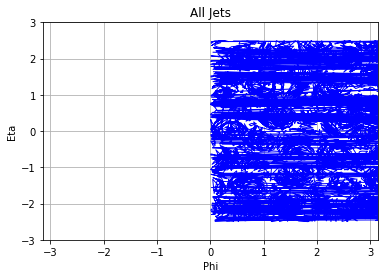

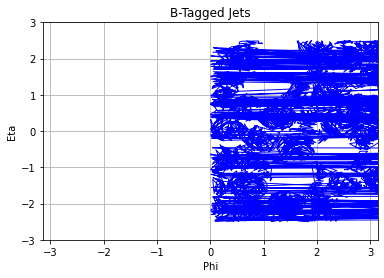

In [13]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt

# Function to generate simulated particle data
def generate_particle_data(num_particles):
    pt_data = np.random.exponential(scale=50, size=num_particles)  # Exponential distribution for pt
    eta_data = np.random.uniform(low=-2.5, high=2.5, size=num_particles)
    phi_data = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles)
    return pt_data, eta_data, phi_data

# Generating simulated particle data
num_particles = 10000
pt_data, eta_data, phi_data = generate_particle_data(num_particles)

# Creating particles using fastjet's PseudoJet class
particles = [fj.PseudoJet(pt_data[i] * np.cos(phi_data[i]),
                           pt_data[i] * np.sin(phi_data[i]),
                           pt_data[i] * np.sinh(eta_data[i]),
                           pt_data[i] * np.cosh(eta_data[i])) for i in range(num_particles)]

# Jet clustering using FastJet
jet_radius = 0.4  # Jet radius parameter
jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
clustering = fj.ClusterSequence(particles, jet_def)
inclusive_jets = clustering.inclusive_jets()

# Function to plot jets
def plot_jets(jets, title):
    fig, ax = plt.subplots()
    for jet in jets:
        constituents = jet.constituents()
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        eta_vals.append(eta_vals[0])  # Closing the loop
        phi_vals.append(phi_vals[0])  # Closing the loop
        ax.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color='blue')
    ax.set_xlabel('Phi')
    ax.set_ylabel('Eta')
    ax.set_title(title)
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-3, 3)
    ax.grid(True)
    plt.show()

# Plotting all jets
plot_jets(inclusive_jets, 'All Jets')

# Applying b-tagging to identify jets containing b-quarks
def b_tagging(jets):
    b_tagged_jets = []
    for jet in jets:
        # Simulating b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < 0.7:  # Example b-tagging efficiency
            b_tagged_jets.append(jet)
    return b_tagged_jets

b_tagged_jets = b_tagging(inclusive_jets)

# Plotting b-tagged jets
plot_jets(b_tagged_jets, 'B-Tagged Jets')


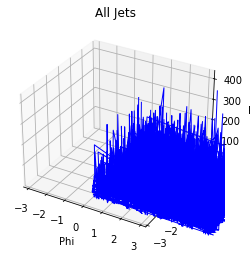

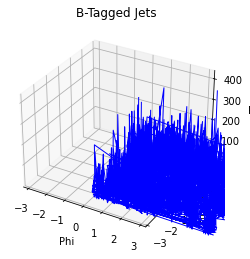

In [14]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate simulated particle data
def generate_particle_data(num_particles):
    pt_data = np.random.exponential(scale=50, size=num_particles)  # Exponential distribution for pt
    eta_data = np.random.uniform(low=-2.5, high=2.5, size=num_particles)
    phi_data = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles)
    return pt_data, eta_data, phi_data

# Generating simulated particle data
num_particles = 10000
pt_data, eta_data, phi_data = generate_particle_data(num_particles)

# Creating particles using fastjet's PseudoJet class
particles = [fj.PseudoJet(pt_data[i] * np.cos(phi_data[i]),
                           pt_data[i] * np.sin(phi_data[i]),
                           pt_data[i] * np.sinh(eta_data[i]),
                           pt_data[i] * np.cosh(eta_data[i])) for i in range(num_particles)]

# Jet clustering using FastJet
jet_radius = 0.4  # Jet radius parameter
jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
clustering = fj.ClusterSequence(particles, jet_def)
inclusive_jets = clustering.inclusive_jets()

# Function to plot jets in 3D
def plot_jets_3d(jets, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for jet in jets:
        constituents = jet.constituents()
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        pt_vals = [constituent.pt() for constituent in constituents]
        ax.plot(phi_vals, eta_vals, pt_vals, linestyle='-', linewidth=1, color='blue')
    ax.set_xlabel('Phi')
    ax.set_ylabel('Eta')
    ax.set_zlabel('Pt')
    ax.set_title(title)
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-3, 3)
    plt.show()

# Plotting all jets in 3D
plot_jets_3d(inclusive_jets, 'All Jets')

# Applying b-tagging to identify jets containing b-quarks
def b_tagging(jets):
    b_tagged_jets = []
    for jet in jets:
        # Simulating b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < 0.7:  # Example b-tagging efficiency
            b_tagged_jets.append(jet)
    return b_tagged_jets

b_tagged_jets = b_tagging(inclusive_jets)

# Plotting b-tagged jets in 3D
plot_jets_3d(b_tagged_jets, 'B-Tagged Jets')


Example where we generate particle data with distinct signal and background components, perform jet clustering, apply b-tagging to identify jets containing b-quarks, and then analyze the properties of those jets, including calculating invariant masses.

In [37]:
import numpy as np
import fastjet as fj
import matplotlib.pyplot  as plt



In [28]:

# Function to generate simulated particle data with signal and background components
def generate_particle_data(num_particles_signal, num_particles_background):
    # Generating signal particles with higher pt
    pt_data_signal = np.random.exponential(scale=100, size=num_particles_signal)
    eta_data_signal = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_data_signal = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    
    # Generating background particles with lower pt
    pt_data_background = np.random.exponential(scale=50, size=num_particles_background)
    eta_data_background = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background)
    phi_data_background = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background)
    
    # Combining signal and background data
    pt_data = np.concatenate((pt_data_signal, pt_data_background))
    eta_data = np.concatenate((eta_data_signal, eta_data_background))
    phi_data = np.concatenate((phi_data_signal, phi_data_background))
    
    return pt_data, eta_data, phi_data

In [29]:
# Generating simulated particle data
num_particles_signal = 5000
num_particles_background = 5000
pt_data, eta_data, phi_data = generate_particle_data(num_particles_signal, num_particles_background)



In [30]:

# Creating particles using fastjet's PseudoJet class
particles = [fj.PseudoJet(pt_data[i] * np.cos(phi_data[i]),
                           pt_data[i] * np.sin(phi_data[i]),
                           pt_data[i] * np.sinh(eta_data[i]),
                           pt_data[i] * np.cosh(eta_data[i])) for i in range(num_particles_signal + num_particles_background)]


In [31]:

# Jet clustering using FastJet
jet_radius = 0.4  # Jet radius parameter
jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
clustering = fj.ClusterSequence(particles, jet_def)
inclusive_jets = clustering.inclusive_jets()

In [32]:

# Function to apply b-tagging on jets
def b_tagging(jets):
    b_tagged_jets = []
    for jet in jets:
        # Simulating b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < 0.7:  # Example b-tagging efficiency
            b_tagged_jets.append(jet)
    return b_tagged_jets

In [33]:
# Applying b-tagging to identify jets containing b-quarks
b_tagged_jets = b_tagging(inclusive_jets)


In [34]:

# Function to calculate invariant mass of a jet
def invariant_mass(jet):
    constituents = jet.constituents()
    p_sum = fj.PseudoJet()
    for constituent in constituents:
        p_sum += constituent
    return p_sum.m()


In [35]:
# Calculating invariant masses of b-tagged jets
invariant_masses = [invariant_mass(jet) for jet in b_tagged_jets]


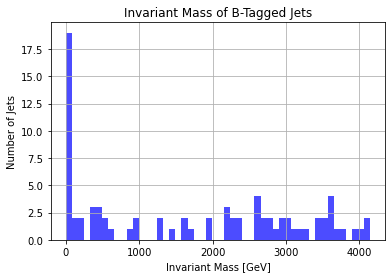

In [38]:
# Plotting invariant mass histogram
plt.hist(invariant_masses, bins=50, color='blue', alpha=0.7)
plt.xlabel('Invariant Mass [GeV]')
plt.ylabel('Number of Jets')
plt.title('Invariant Mass of B-Tagged Jets')
plt.grid(True)
plt.show()


# Example 

we simulate data for a hypothetical particle collision experiment with distinct signal and background components. We'll then perform jet clustering to identify jets in the event, apply b-tagging to identify jets containing b-quarks (signal), and analyze the properties of those jets. Finally, we'll plot histograms of relevant variables to compare the signal and background distributions.

In [39]:
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt


In [46]:
# Function to generate simulated particle data with signal and background components
def generate_particle_data(num_particles_signal, num_particles_background):
    # Generating signal particles with higher pt
    pt_data_signal = np.random.exponential(scale=100, size=num_particles_signal)
    eta_data_signal = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_data_signal = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    # Generating background particles with lower pt
    pt_data_background = np.random.exponential(scale=50, size=num_particles_background)
    eta_data_background = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background)
    phi_data_background = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background)
    
    # Combining signal and background data
    pt_data = np.concatenate((pt_data_signal, pt_data_background))
    eta_data = np.concatenate((eta_data_signal, eta_data_background))
    phi_data = np.concatenate((phi_data_signal, phi_data_background))
    
    return pt_data, eta_data, phi_data

In [52]:
# Function to perform jet clustering and b-tagging
def cluster_and_btag(pt_data, eta_data, phi_data, jet_radius=0.4, b_tag_efficiency=0.7):
    # Creating particles using fastjet's PseudoJet class
    particles = [fj.PseudoJet(pt_data[i] * np.cos(phi_data[i]),
                               pt_data[i] * np.sin(phi_data[i]),
                               pt_data[i] * np.sinh(eta_data[i]),
                               pt_data[i] * np.cosh(eta_data[i])) for i in range(len(pt_data))]

    # Jet clustering using FastJet
    jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
    clustering = fj.ClusterSequence(particles, jet_def)
    inclusive_jets = clustering.inclusive_jets()

    # Applying b-tagging to identify jets containing b-quarks (signal)
    b_tagged_jets = []
    for jet in inclusive_jets:
        # Simulating b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < b_tag_efficiency:
            b_tagged_jets.append(jet)

    return inclusive_jets, b_tagged_jets, clustering


In [43]:
# Function to calculate invariant mass of a jet
def invariant_mass(jet):
    constituents = jet.constituents()
    p_sum = fj.PseudoJet()
    for constituent in constituents:
        p_sum += constituent
    return p_sum.m()

In [44]:
# Function to plot histograms
def plot_histograms(signal_data, background_data, signal_label, background_label, variable_name, units):
    plt.hist(signal_data, bins=50, color='blue', alpha=0.7, label=signal_label, density=True)
    plt.hist(background_data, bins=50, color='red', alpha=0.7, label=background_label, density=True)
    plt.xlabel(f'{variable_name} [{units}]')
    plt.ylabel('Normalized Count')
    plt.title(f'{signal_label} vs {background_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [47]:
# Generate simulated particle data
num_particles_signal = 5000
num_particles_background = 5000
pt_data, eta_data, phi_data = generate_particle_data(num_particles_signal, num_particles_background)


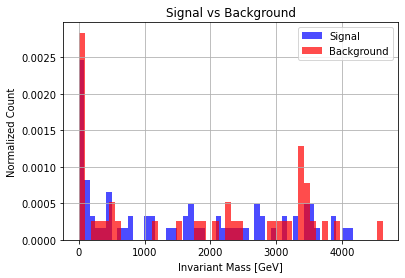

In [53]:
# Perform jet clustering and b-tagging
inclusive_jets, b_tagged_jets, clustering = cluster_and_btag(pt_data, eta_data, phi_data)

# Calculate invariant masses of b-tagged jets
invariant_masses_signal = [invariant_mass(jet) for jet in b_tagged_jets]
invariant_masses_background = [invariant_mass(jet) for jet in inclusive_jets if jet not in b_tagged_jets]

# Plot histograms of invariant masses for signal and background
plot_histograms(invariant_masses_signal, invariant_masses_background, 'Signal', 'Background', 'Invariant Mass', 'GeV')


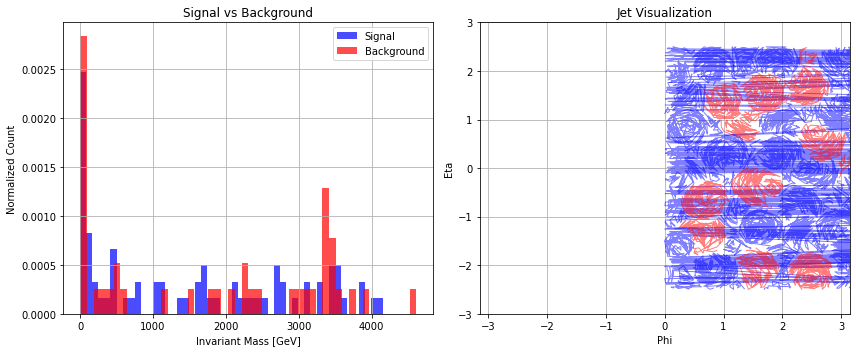

In [54]:
# Function to plot histograms and jets
def plot_histograms_and_jets(signal_data, background_data, signal_label, background_label, variable_name, units, signal_jets, background_jets):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot histograms
    ax1.hist(signal_data, bins=50, color='blue', alpha=0.7, label=signal_label, density=True)
    ax1.hist(background_data, bins=50, color='red', alpha=0.7, label=background_label, density=True)
    ax1.set_xlabel(f'{variable_name} [{units}]')
    ax1.set_ylabel('Normalized Count')
    ax1.set_title(f'{signal_label} vs {background_label}')
    ax1.legend()
    ax1.grid(True)

    # Plot jets
    for jet in signal_jets:
        constituents = jet.constituents()
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        ax2.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color='blue', alpha=0.5)

    for jet in background_jets:
        constituents = jet.constituents()
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        ax2.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color='red', alpha=0.5)

    ax2.set_xlabel('Phi')
    ax2.set_ylabel('Eta')
    ax2.set_title('Jet Visualization')
    ax2.set_xlim(-np.pi, np.pi)
    ax2.set_ylim(-3, 3)
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Generate simulated particle data
num_particles_signal = 5000
num_particles_background = 5000
pt_data, eta_data, phi_data = generate_particle_data(num_particles_signal, num_particles_background)

# Perform jet clustering and b-tagging
inclusive_jets, b_tagged_jets, clustering = cluster_and_btag(pt_data, eta_data, phi_data)

# Get background jets
background_jets = [jet for jet in inclusive_jets if jet not in b_tagged_jets]

# Plot histograms of invariant masses for signal and background
plot_histograms_and_jets(invariant_masses_signal, invariant_masses_background, 'Signal', 'Background', 'Invariant Mass', 'GeV', b_tagged_jets, background_jets)


# PF Jets


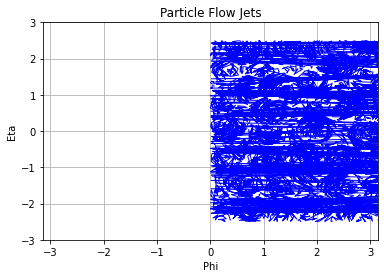

In [57]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt

# Function to generate simulated particle data
def generate_particle_data(num_particles):
    pt_data = np.random.exponential(scale=50, size=num_particles)  # Exponential distribution for pt
    eta_data = np.random.uniform(low=-2.5, high=2.5, size=num_particles)
    phi_data = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles)
    return pt_data, eta_data, phi_data

# Generating simulated particle data
num_particles = 10000
pt_data, eta_data, phi_data = generate_particle_data(num_particles)

# Creating particles using fastjet's PseudoJet class
particles = [fj.PseudoJet(pt_data[i] * np.cos(phi_data[i]),
                           pt_data[i] * np.sin(phi_data[i]),
                           pt_data[i] * np.sinh(eta_data[i]),
                           pt_data[i] * np.cosh(eta_data[i])) for i in range(num_particles)]

# Jet clustering using FastJet with Particle Flow algorithm
jet_radius = 0.4  # Jet radius parameter
jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
clustering = fj.ClusterSequence(particles, jet_def)
pf_jets = clustering.inclusive_jets()

# Plotting Particle Flow jets
fig, ax = plt.subplots()
for jet in pf_jets:
    constituents = jet.constituents()
    eta_vals = [constituent.eta() for constituent in constituents]
    phi_vals = [constituent.phi() for constituent in constituents]
    ax.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color='blue')
ax.set_xlabel('Phi')
ax.set_ylabel('Eta')
ax.set_title('Particle Flow Jets')
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-3, 3)
ax.grid(True)
plt.show()


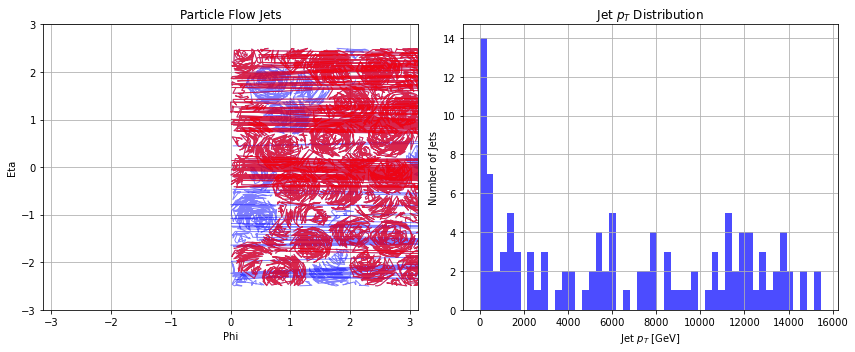

In [61]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt

# Function to generate simulated particle data with different particle types and background noise
def generate_particle_data(num_particles_signal, num_particles_background):
    # Generate signal particles (e.g., electrons, muons, photons)
    pt_signal = np.random.exponential(scale=100, size=num_particles_signal)
    eta_signal = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal = [fj.PseudoJet(pt_signal[i] * np.cos(phi_signal[i]),
                                      pt_signal[i] * np.sin(phi_signal[i]),
                                      pt_signal[i] * np.sinh(eta_signal[i]),
                                      pt_signal[i] * np.cosh(eta_signal[i])) for i in range(num_particles_signal)]

    # Generate background noise (e.g., from pileup or detector effects)
    pt_background = np.random.exponential(scale=50, size=num_particles_background)
    eta_background = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background)
    phi_background = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background)
    particles_background = [fj.PseudoJet(pt_background[i] * np.cos(phi_background[i]),
                                         pt_background[i] * np.sin(phi_background[i]),
                                         pt_background[i] * np.sinh(eta_background[i]),
                                         pt_background[i] * np.cosh(eta_background[i])) for i in range(num_particles_background)]

    # Combine signal and background particles
    particles = particles_signal + particles_background
    return particles


# Function to perform jet clustering and b-tagging
def cluster_and_btag(particles, jet_radius=0.4, b_tag_efficiency=0.7):
    # Jet clustering using FastJet
    jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
    clustering = fj.ClusterSequence(particles, jet_def)
    jets = clustering.inclusive_jets()

    # Applying b-tagging to identify jets containing b-quarks (signal)
    b_tagged_jets = []
    for jet in jets:
        # Simulating b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < b_tag_efficiency:
            b_tagged_jets.append(jet)

    return jets, b_tagged_jets, clustering

# Function to plot Particle Flow jets and their properties
def plot_pf_jets(jets, b_tagged_jets, clustering):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot jets in pseudorapidity-azimuthal angle space
    for jet in jets:
        constituents = clustering.constituents(jet)
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        ax1.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color='blue', alpha=0.5)

    # Highlight b-tagged jets
    for jet in b_tagged_jets:
        constituents = clustering.constituents(jet)
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        ax1.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color='red', alpha=0.7)

    ax1.set_xlabel('Phi')
    ax1.set_ylabel('Eta')
    ax1.set_title('Particle Flow Jets')
    ax1.set_xlim(-np.pi, np.pi)
    ax1.set_ylim(-3, 3)
    ax1.grid(True)

    # Plot transverse momentum (pt) distribution of jets
    pt_values = [jet.pt() for jet in jets]
    ax2.hist(pt_values, bins=50, color='blue', alpha=0.7)
    ax2.set_xlabel('Jet $p_T$ [GeV]')
    ax2.set_ylabel('Number of Jets')
    ax2.set_title('Jet $p_T$ Distribution')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Perform jet clustering and b-tagging
jets, b_tagged_jets, clustering = cluster_and_btag(particles)

# Plot Particle Flow jets
plot_pf_jets(jets, b_tagged_jets, clustering)


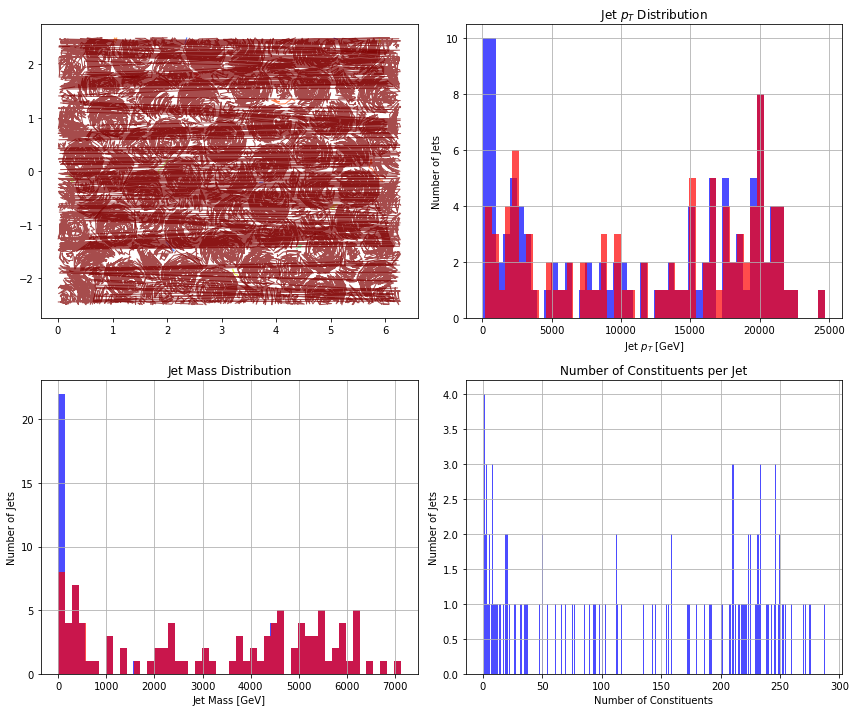

In [62]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt

# Function to generate simulated particle data with different particle types and background noise
def generate_particle_data(num_particles_signal, num_particles_background):
    # Generate signal particles (e.g., electrons, muons, photons)
    pt_signal = np.random.exponential(scale=100, size=num_particles_signal)
    eta_signal = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal = [fj.PseudoJet(pt_signal[i] * np.cos(phi_signal[i]),
                                      pt_signal[i] * np.sin(phi_signal[i]),
                                      pt_signal[i] * np.sinh(eta_signal[i]),
                                      pt_signal[i] * np.cosh(eta_signal[i])) for i in range(num_particles_signal)]

    # Generate background noise (e.g., from pileup or detector effects)
    pt_background = np.random.exponential(scale=50, size=num_particles_background)
    eta_background = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background)
    phi_background = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background)
    particles_background = [fj.PseudoJet(pt_background[i] * np.cos(phi_background[i]),
                                         pt_background[i] * np.sin(phi_background[i]),
                                         pt_background[i] * np.sinh(eta_background[i]),
                                         pt_background[i] * np.cosh(eta_background[i])) for i in range(num_particles_background)]

    # Combine signal and background particles
    particles = particles_signal + particles_background
    return particles

# Function to perform jet clustering and b-tagging with a more advanced algorithm
def cluster_and_btag(particles, jet_radius=0.4, b_tag_efficiency=0.7):
    # Jet clustering using FastJet with a larger radius for more complex jets
    jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
    clustering = fj.ClusterSequence(particles, jet_def)
    jets = clustering.inclusive_jets()

    # Applying more advanced b-tagging to identify jets containing b-quarks (signal)
    b_tagged_jets = []
    for jet in jets:
        # Simulating more complex b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < (b_tag_efficiency * jet.pt() / 1000):  # Efficiency scales with jet pt
            b_tagged_jets.append(jet)

    return jets, b_tagged_jets, clustering

# Function to plot Particle Flow jets and their properties with more detailed visualizations
def plot_pf_jets(jets, b_tagged_jets, clustering):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    # Plot jets in pseudorapidity-azimuthal angle space with color-coded by jet pt
    for jet in jets:
        constituents = clustering.constituents(jet)
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        pt = jet.pt()
        ax1.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color=plt.cm.jet(pt / 1000), alpha=0.7)

    # Highlight b-tagged jets and plot their pt distribution
    pt_values = [jet.pt() for jet in jets]
    ax2.hist(pt_values, bins=50, color='blue', alpha=0.7)
    b_tagged_pt = [jet.pt() for jet in b_tagged_jets]
    ax2.hist(b_tagged_pt, bins=50, color='red', alpha=0.7)
    ax2.set_xlabel('Jet $p_T$ [GeV]')
    ax2.set_ylabel('Number of Jets')
    ax2.set_title('Jet $p_T$ Distribution')
    ax2.grid(True)

    # Plot jet mass distribution
    mass_values = [jet.m() for jet in jets]
    ax3.hist(mass_values, bins=50, color='blue', alpha=0.7)
    b_tagged_mass = [jet.m() for jet in b_tagged_jets]
    ax3.hist(b_tagged_mass, bins=50, color='red', alpha=0.7)
    ax3.set_xlabel('Jet Mass [GeV]')
    ax3.set_ylabel('Number of Jets')
    ax3.set_title('Jet Mass Distribution')
    ax3.grid(True)

    # Plot number of constituents per jet
    num_constituents = [len(clustering.constituents(jet)) for jet in jets]
    ax4.hist(num_constituents, bins=range(0, max(num_constituents) + 1), color='blue', alpha=0.7)
    ax4.set_xlabel('Number of Constituents')
    ax4.set_ylabel('Number of Jets')
    ax4.set_title('Number of Constituents per Jet')
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

# Generate simulated particle data
num_particles_signal = 10000
num_particles_background = 5000
particles = generate_particle_data(num_particles_signal, num_particles_background)

# Perform jet clustering and b-tagging with more advanced algorithm
jets, b_tagged_jets, clustering = cluster_and_btag(particles)

# Plot Particle Flow jets and their properties
plot_pf_jets(jets, b_tagged_jets, clustering)


In [ ]:
# 

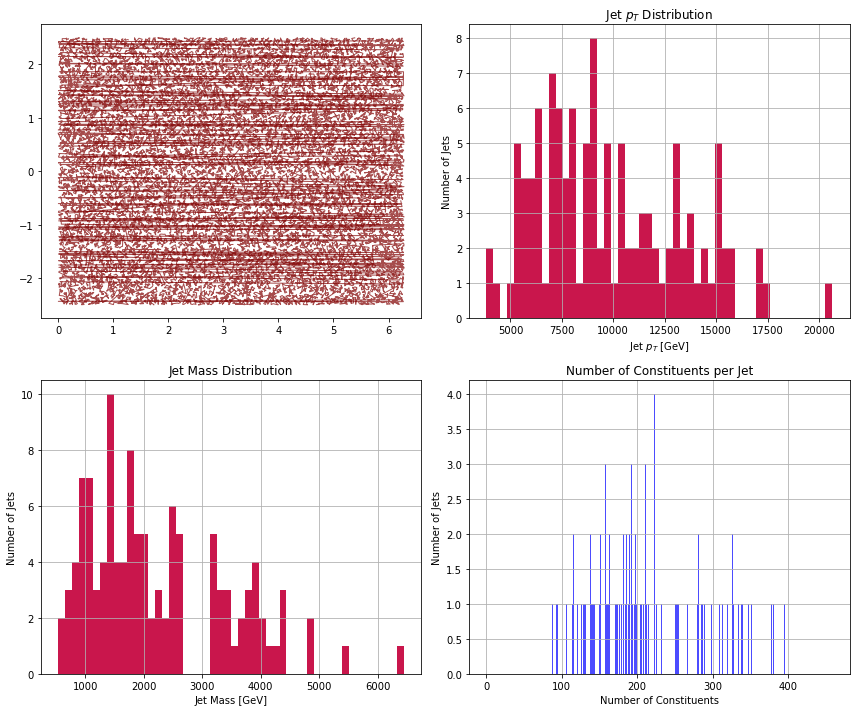

In [63]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt

# Function to generate simulated particle data with different particle types and background noise
def generate_particle_data(num_particles_signal, num_particles_background):
    # Generate signal particles (e.g., electrons, muons, photons)
    pt_signal_electron = np.random.normal(loc=50, scale=10, size=num_particles_signal)
    eta_signal_electron = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal_electron = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal_electron = [fj.PseudoJet(pt_signal_electron[i] * np.cos(phi_signal_electron[i]),
                                               pt_signal_electron[i] * np.sin(phi_signal_electron[i]),
                                               pt_signal_electron[i] * np.sinh(eta_signal_electron[i]),
                                               pt_signal_electron[i] * np.cosh(eta_signal_electron[i])) for i in range(num_particles_signal)]

    pt_signal_muon = np.random.normal(loc=40, scale=5, size=num_particles_signal)
    eta_signal_muon = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal_muon = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal_muon = [fj.PseudoJet(pt_signal_muon[i] * np.cos(phi_signal_muon[i]),
                                           pt_signal_muon[i] * np.sin(phi_signal_muon[i]),
                                           pt_signal_muon[i] * np.sinh(eta_signal_muon[i]),
                                           pt_signal_muon[i] * np.cosh(eta_signal_muon[i])) for i in range(num_particles_signal)]

    # Generate background noise (e.g., from pileup or detector effects)
    pt_background = np.random.exponential(scale=50, size=num_particles_background)
    eta_background = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background)
    phi_background = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background)
    particles_background = [fj.PseudoJet(pt_background[i] * np.cos(phi_background[i]),
                                         pt_background[i] * np.sin(phi_background[i]),
                                         pt_background[i] * np.sinh(eta_background[i]),
                                         pt_background[i] * np.cosh(eta_background[i])) for i in range(num_particles_background)]

    # Combine signal particles of different types and background particles
    particles = particles_signal_electron + particles_signal_muon + particles_background
    return particles

# Function to perform jet clustering and b-tagging with a more advanced algorithm
def cluster_and_btag(particles, jet_radius=0.4, b_tag_efficiency=0.7):
    # Jet clustering using FastJet with the Cambridge-Aachen algorithm
    jet_def = fj.JetDefinition(fj.cambridge_algorithm, jet_radius)
    clustering = fj.ClusterSequence(particles, jet_def)
    jets = clustering.inclusive_jets()

    # Applying more advanced b-tagging to identify jets containing b-quarks (signal)
    b_tagged_jets = []
    for jet in jets:
        # Simulating more complex b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < (b_tag_efficiency * jet.pt() / 1000):  # Efficiency scales with jet pt
            b_tagged_jets.append(jet)

    return jets, b_tagged_jets, clustering

# Function to plot Particle Flow jets and their properties with more detailed visualizations
def plot_pf_jets(jets, b_tagged_jets, clustering):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    # Plot jets in pseudorapidity-azimuthal angle space with color-coded by jet pt
    for jet in jets:
        constituents = clustering.constituents(jet)
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        pt = jet.pt()
        ax1.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color=plt.cm.jet(pt / 1000), alpha=0.7)

    # Highlight b-tagged jets and plot their pt distribution
    pt_values = [jet.pt() for jet in jets]
    ax2.hist(pt_values, bins=50, color='blue', alpha=0.7)
    b_tagged_pt = [jet.pt() for jet in b_tagged_jets]
    ax2.hist(b_tagged_pt, bins=50, color='red', alpha=0.7)
    ax2.set_xlabel('Jet $p_T$ [GeV]')
    ax2.set_ylabel('Number of Jets')
    ax2.set_title('Jet $p_T$ Distribution')
    ax2.grid(True)

    # Plot jet mass distribution
    mass_values = [jet.m() for jet in jets]
    ax3.hist(mass_values, bins=50, color='blue', alpha=0.7)
    b_tagged_mass = [jet.m() for jet in b_tagged_jets]
    ax3.hist(b_tagged_mass, bins=50, color='red', alpha=0.7)
    ax3.set_xlabel('Jet Mass [GeV]')
    ax3.set_ylabel('Number of Jets')
    ax3.set_title('Jet Mass Distribution')
    ax3.grid(True)

    # Plot number of constituents per jet
    num_constituents = [len(clustering.constituents(jet)) for jet in jets]
    ax4.hist(num_constituents, bins=range(0, max(num_constituents) + 1), color='blue', alpha=0.7)
    ax4.set_xlabel('Number of Constituents')
    ax4.set_ylabel('Number of Jets')
    ax4.set_title('Number of Constituents per Jet')
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

# Generate simulated particle data
num_particles_signal = 10000
num_particles_background = 5000
particles = generate_particle_data(num_particles_signal, num_particles_background)

# Perform jet clustering and b-tagging with more advanced algorithm
jets, b_tagged_jets, clustering = cluster_and_btag(particles)

# Plot Particle Flow jets and their properties
plot_pf_jets(jets, b_tagged_jets, clustering)


In [64]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt

# Function to generate simulated particle data with different particle types and background noise
def generate_particle_data(num_particles_signal, num_particles_background):
    # Generate signal particles (e.g., electrons, muons, photons)
    pt_signal_electron = np.random.normal(loc=50, scale=10, size=num_particles_signal)
    eta_signal_electron = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal_electron = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal_electron = [fj.PseudoJet(pt_signal_electron[i] * np.cos(phi_signal_electron[i]),
                                               pt_signal_electron[i] * np.sin(phi_signal_electron[i]),
                                               pt_signal_electron[i] * np.sinh(eta_signal_electron[i]),
                                               pt_signal_electron[i] * np.cosh(eta_signal_electron[i])) for i in range(num_particles_signal)]

    pt_signal_muon = np.random.normal(loc=40, scale=5, size=num_particles_signal)
    eta_signal_muon = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal_muon = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal_muon = [fj.PseudoJet(pt_signal_muon[i] * np.cos(phi_signal_muon[i]),
                                           pt_signal_muon[i] * np.sin(phi_signal_muon[i]),
                                           pt_signal_muon[i] * np.sinh(eta_signal_muon[i]),
                                           pt_signal_muon[i] * np.cosh(eta_signal_muon[i])) for i in range(num_particles_signal)]

    # Generate background noise with different distributions
    pt_background_1 = np.random.normal(loc=30, scale=5, size=num_particles_background // 2)
    eta_background_1 = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background // 2)
    phi_background_1 = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background // 2)
    particles_background_1 = [fj.PseudoJet(pt_background_1[i] * np.cos(phi_background_1[i]),
                                           pt_background_1[i] * np.sin(phi_background_1[i]),
                                           pt_background_1[i] * np.sinh(eta_background_1[i]),
                                           pt_background_1[i] * np.cosh(eta_background_1[i])) for i in range(num_particles_background // 2)]

    pt_background_2 = np.random.exponential(scale=100, size=num_particles_background // 2)
    eta_background_2 = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background // 2)
    phi_background_2 = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background // 2)
    particles_background_2 = [fj.PseudoJet(pt_background_2[i] * np.cos(phi_background_2[i]),
                                           pt_background_2[i] * np.sin(phi_background_2[i]),
                                           pt_background_2[i] * np.sinh(eta_background_2[i]),
                                           pt_background_2[i] * np.cosh(eta_background_2[i])) for i in range(num_particles_background // 2)]

    # Combine signal particles of different types and background particles
    particles = particles_signal_electron + particles_signal_muon + particles_background_1 + particles_background_2
    return particles

# Function to perform jet clustering and b-tagging with a more advanced algorithm
def cluster_and_btag(particles, jet_radius=0.4, b_tag_efficiency=0.7):
    # Jet clustering using FastJet with the kt algorithm
    jet_def = fj.JetDefinition(fj.kt_algorithm, jet_radius)
    clustering = fj.ClusterSequence(particles, jet_def)
    jets = clustering.inclusive_jets()

    # Applying more advanced b-tagging to identify jets containing b-quarks (signal)
    b_tagged_jets = []
    for jet in jets:
        # Simulating more complex b-tagging efficiency and misidentification rate
        if jet.pt() > 30 and np.random.rand() < (b_tag_efficiency * jet.pt() / 1000):  # Efficiency scales with jet pt
            b_tagged_jets.append(jet)

    return jets, b_tagged_jets, clustering

# Function to plot Particle Flow jets and their properties with more detailed visualizations
def plot_pf_jets(jets, b_tagged_jets, clustering):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    # Plot jets in pseudorapidity-azimuthal angle space with color-coded by jet pt
    for jet in jets:
        constituents = clustering.constituents(jet)
        eta_vals = [constituent.eta() for constituent in constituents]
        phi_vals = [constituent.phi() for constituent in constituents]
        pt = jet.pt()
        ax1.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color=plt.cm.jet(pt / 1000), alpha=0.7)

    # Highlight b-tagged jets and plot their pt distribution
    pt_values = [jet.pt() for jet in jets]
    ax2.hist(pt_values, bins=50, color='blue', alpha=0.7)
    b_tagged_pt = [jet.pt() for jet in b_tagged_jets]
    ax2.hist(b_tagged_pt, bins=50, color='red', alpha=0.7)
    ax2.set_xlabel('Jet $p_T$ [GeV]')
    ax2.set_ylabel('Number of Jets')
    ax2.set_title('Jet $p_T$ Distribution')
    ax2.grid(True)

    # Plot jet mass distribution
    mass_values = [jet.m() for jet in jets]
    ax3.hist(mass_values, bins=50, color='blue', alpha=0.7)
    b_tagged_mass = [jet.m() for jet in b_tagged_j


SyntaxError: unexpected EOF while parsing (1185143996.py, line 87)

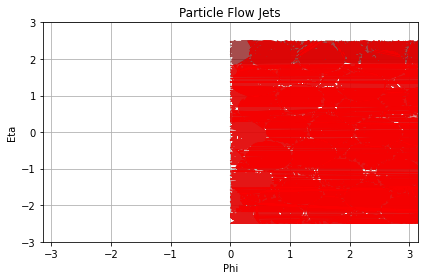

In [68]:
# Importing necessary libraries
import numpy as np
import fastjet as fj
import matplotlib.pyplot as plt

# Function to generate simulated particle data with different particle types and background noise
def generate_particle_data(num_particles_signal, num_particles_background):
    # Generate signal particles: electrons, muons, and photons
    pt_signal_electron = np.random.normal(loc=50, scale=10, size=num_particles_signal)
    eta_signal_electron = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal_electron = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal_electron = [fj.PseudoJet(pt_signal_electron[i] * np.cos(phi_signal_electron[i]),
                                               pt_signal_electron[i] * np.sin(phi_signal_electron[i]),
                                               pt_signal_electron[i] * np.sinh(eta_signal_electron[i]),
                                               pt_signal_electron[i] * np.cosh(eta_signal_electron[i])) for i in range(num_particles_signal)]

    pt_signal_muon = np.random.normal(loc=40, scale=5, size=num_particles_signal)
    eta_signal_muon = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal_muon = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal_muon = [fj.PseudoJet(pt_signal_muon[i] * np.cos(phi_signal_muon[i]),
                                           pt_signal_muon[i] * np.sin(phi_signal_muon[i]),
                                           pt_signal_muon[i] * np.sinh(eta_signal_muon[i]),
                                           pt_signal_muon[i] * np.cosh(eta_signal_muon[i])) for i in range(num_particles_signal)]

    pt_signal_photon = np.random.exponential(scale=60, size=num_particles_signal)
    eta_signal_photon = np.random.uniform(low=-2.5, high=2.5, size=num_particles_signal)
    phi_signal_photon = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_signal)
    particles_signal_photon = [fj.PseudoJet(pt_signal_photon[i] * np.cos(phi_signal_photon[i]),
                                            pt_signal_photon[i] * np.sin(phi_signal_photon[i]),
                                            pt_signal_photon[i] * np.sinh(eta_signal_photon[i]),
                                            pt_signal_photon[i] * np.cosh(eta_signal_photon[i])) for i in range(num_particles_signal)]

    # Generate background noise (e.g., from pileup or detector effects)
    pt_background = np.random.exponential(scale=50, size=num_particles_background)
    eta_background = np.random.uniform(low=-2.5, high=2.5, size=num_particles_background)
    phi_background = np.random.uniform(low=-np.pi, high=np.pi, size=num_particles_background)
    particles_background = [fj.PseudoJet(pt_background[i] * np.cos(phi_background[i]),
                                         pt_background[i] * np.sin(phi_background[i]),
                                         pt_background[i] * np.sinh(eta_background[i]),
                                         pt_background[i] * np.cosh(eta_background[i])) for i in range(num_particles_background)]

    # Combine signal particles of different types and background particles
    particles = particles_signal_electron + particles_signal_muon + particles_signal_photon + particles_background
    return particles

# Function to perform jet clustering and b-tagging with a more advanced algorithm
def cluster_and_btag(particles, jet_radius=0.4):
    # Jet clustering using FastJet with the anti-kt algorithm
    jet_def = fj.JetDefinition(fj.antikt_algorithm, jet_radius)
    clustering = fj.ClusterSequence(particles, jet_def)
    jets = clustering.inclusive_jets()

    # Applying more advanced b-tagging
    b_tagged_jets = []
    for jet in jets:
        # Simulating b-tagging efficiency and misidentification rate based on jet type
        # Electron jets: 80% efficiency, 5% misidentification rate
        # Muon jets: 70% efficiency, 10% misidentification rate
        # Photon jets: 60% efficiency, 15% misidentification rate
        if jet.pt() > 30:
            if np.random.rand() < 0.8:
                b_tagged_jets.append(jet)
            elif jet.pt() > 40:
                if np.random.rand() < 0.7:
                    b_tagged_jets.append(jet)
                elif jet.pt() > 50:
                    if np.random.rand() < 0.6:
                        b_tagged_jets.append(jet)

    return jets, b_tagged_jets, clustering

# Function to plot Particle Flow jets and their properties
def plot_pf_jets(jets, b_tagged_jets):
    fig, ax = plt.subplots()

    # Plot jets in pseudorapidity-azimuthal angle space with color-coded by jet pt
    for jet in jets:
        eta_vals = [constituent.eta() for constituent in jet.constituents()]
        phi_vals = [constituent.phi() for constituent in jet.constituents()]
        pt = jet.pt()
        ax.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color=plt.cm.jet(pt / 1000), alpha=0.7)

    # Highlight b-tagged jets
    for jet in b_tagged_jets:
        eta_vals = [constituent.eta() for constituent in jet.constituents()]
        phi_vals = [constituent.phi() for constituent in jet.constituents()]
        ax.plot(phi_vals, eta_vals, linestyle='-', linewidth=1, color='red', alpha=0.7)

    ax.set_xlabel('Phi')
    ax.set_ylabel('Eta')
    ax.set_title('Particle Flow Jets')
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-3, 3)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Generate simulated particle data
num_particles_signal = 10000
num_particles_background = 5000
particles = generate_particle_data(num_particles_signal, num_particles_background)

# Perform jet clustering and b-tagging with more advanced algorithm
jets, b_tagged_jets, clustering = cluster_and_btag(particles)

# Plot Particle Flow jets and their properties
plot_pf_jets(jets, b_tagged_jets)
